In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score, roc_auc_score
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import label_binarize

In [2]:
data = fetch_covtype()
X = data.data
y = data.target

print(f"Количество примеров в датасете: {X.shape[0]}")
print(f"Количество признаков: {X.shape[1]}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Определяем классификаторы
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000, multi_class='ovr'),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
}

# Словарь для хранения метрик
metrics = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'Fbeta (beta=0.5)': [],
    'Fbeta (beta=1)': [],
    'Fbeta (beta=2)': [],
    'AUC': []
}

Количество примеров в датасете: 581012
Количество признаков: 54


/home/dbulgakov/ml/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Confusion Matrix for Logistic Regression:
[[43904 18409    52     0     3     2  1186]
 [15219 67533  1977     3    95   140   111]
 [    0  1117  9021   116     3   381     0]
 [    0     0   477   233     0    85     0]
 [   64  2553   287     0    37     0     0]
 [    0  1852  2858    32    17   468     0]
 [ 2792    44    23     0     0     0  3210]]


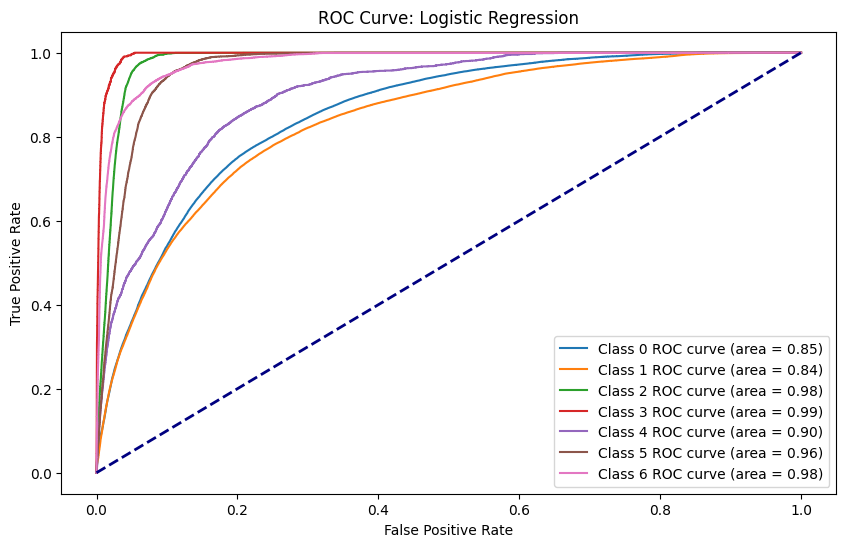

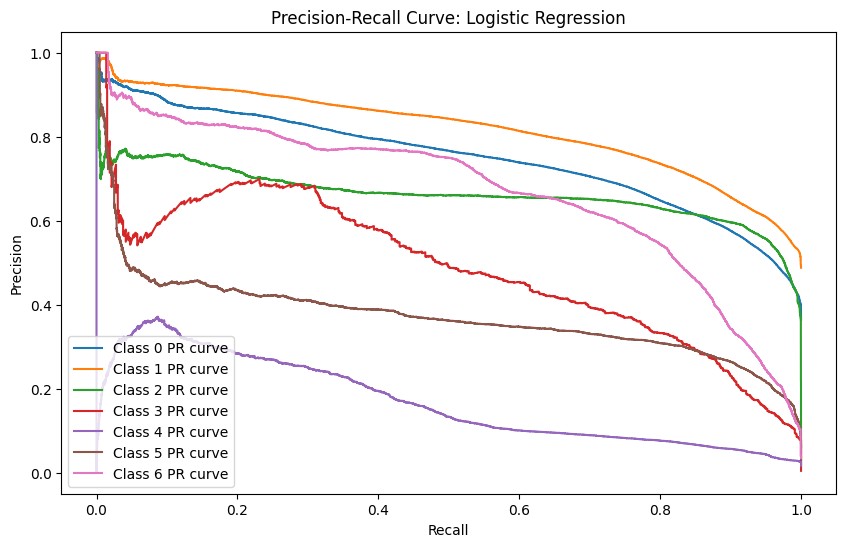

Confusion Matrix for Random Forest:
[[59709  3674     3     0    19     7   144]
 [ 2025 82645   168     0   107    99    34]
 [    3   171 10206    37     8   213     0]
 [    0     0    98   676     0    21     0]
 [   51   614    45     0  2213    18     0]
 [    6   175   360    26     2  4658     0]
 [  273    34     0     0     1     0  5761]]


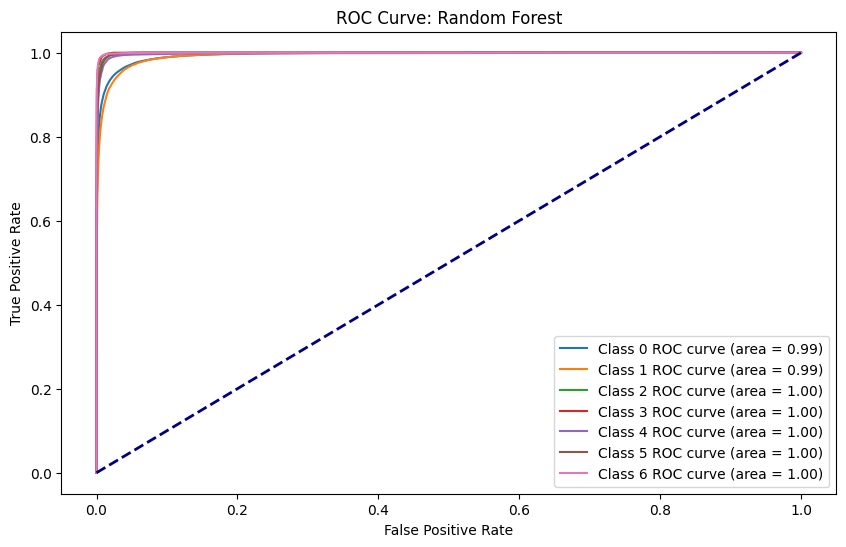

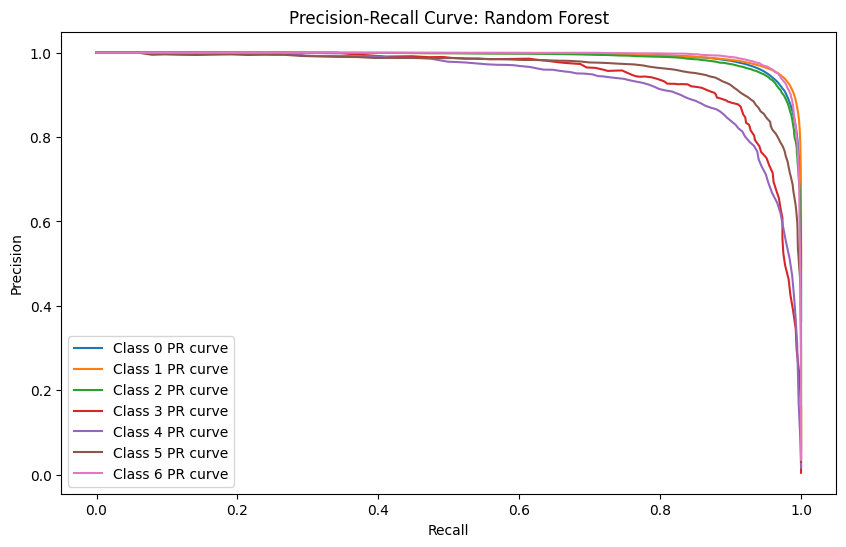

Confusion Matrix for Gradient Boosting:
[[47454 15421    24     0    29    24   604]
 [13468 70057   779     1   184   536    53]
 [    0  1002  8801   112     9   714     0]
 [    0     0   183   588     0    24     0]
 [   33  2128    83     0   691     6     0]
 [    0  1068  1610    40     4  2505     0]
 [ 1799    41     0     0     0     0  4229]]


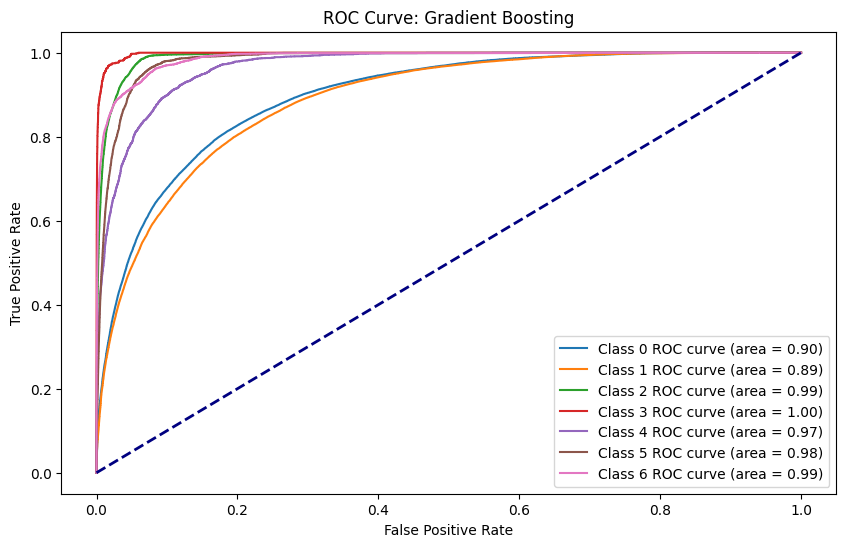

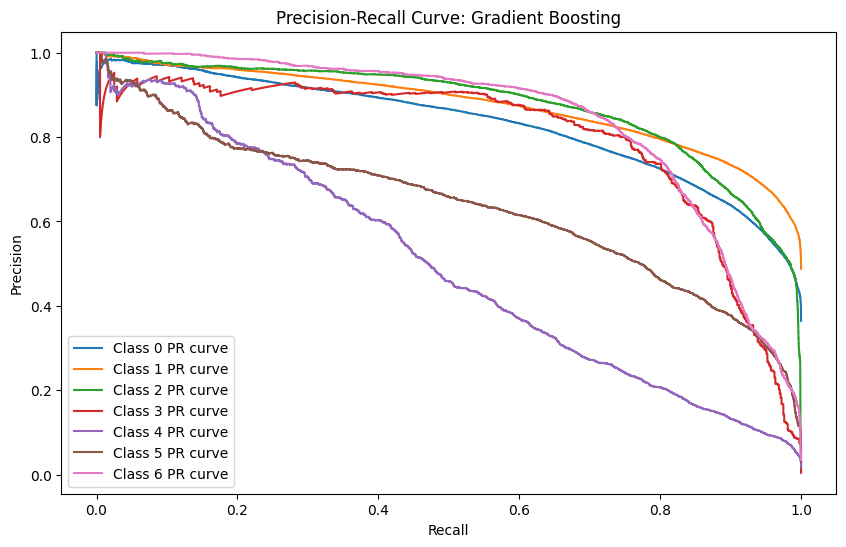

Confusion Matrix for K-Nearest Neighbors:
[[58529  4615     1     0    62    20   329]
 [ 3894 80287   239     0   336   271    51]
 [   10   331  9638    71    19   569     0]
 [    0     3   169   579     0    44     0]
 [   97   569    51     0  2206    18     0]
 [   25   320   642    33    10  4197     0]
 [  327    62     0     0     1     0  5679]]


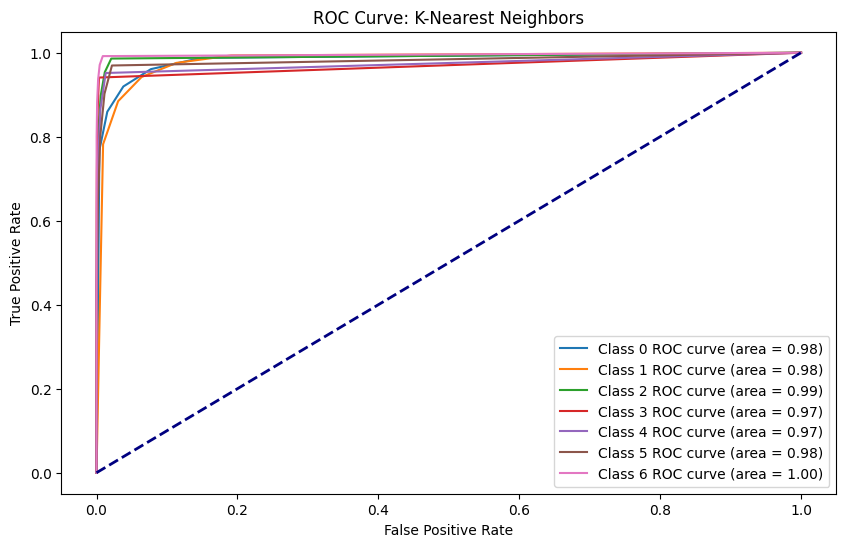

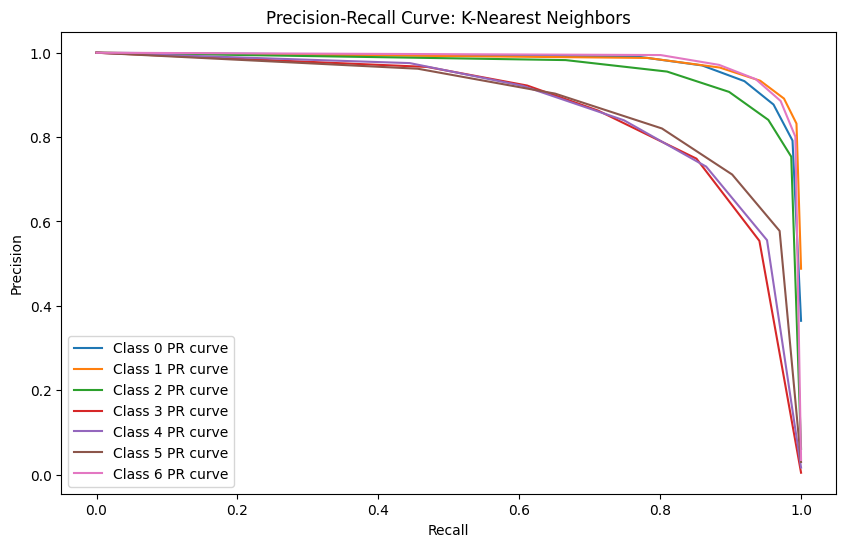

Metrics:
Accuracy:
  Logistic Regression: 0.7137
  Random Forest: 0.9516
  Gradient Boosting: 0.7706
  K-Nearest Neighbors: 0.9243
Precision:
  Logistic Regression: 0.7006
  Random Forest: 0.9517
  Gradient Boosting: 0.7699
  K-Nearest Neighbors: 0.9241
Recall:
  Logistic Regression: 0.7137
  Random Forest: 0.9516
  Gradient Boosting: 0.7706
  K-Nearest Neighbors: 0.9243
Fbeta (beta=0.5):
  Logistic Regression: 0.6957
  Random Forest: 0.9515
  Gradient Boosting: 0.7671
  K-Nearest Neighbors: 0.9241
Fbeta (beta=1):
  Logistic Regression: 0.6996
  Random Forest: 0.9513
  Gradient Boosting: 0.7668
  K-Nearest Neighbors: 0.9241
Fbeta (beta=2):
  Logistic Regression: 0.7073
  Random Forest: 0.9514
  Gradient Boosting: 0.7687
  K-Nearest Neighbors: 0.9242
AUC:
  Logistic Regression: 0.9297
  Random Forest: 0.9976
  Gradient Boosting: 0.9583
  K-Nearest Neighbors: 0.9825


In [3]:
# Бинаризация меток для многоклассовой PR кривой
y_train_bin = label_binarize(y_train, classes=np.unique(y))
y_test_bin = label_binarize(y_test, classes=np.unique(y))

# Обучаем классификаторы и оцениваем метрики
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)  # Для AUC и PR-кривой

    metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
    
    metrics['Precision'].append(precision_score(y_test, y_pred, average='weighted'))
    
    metrics['Recall'].append(recall_score(y_test, y_pred, average='weighted'))
    
    metrics['Fbeta (beta=0.5)'].append(fbeta_score(y_test, y_pred, beta=0.5, average='weighted'))
    metrics['Fbeta (beta=1)'].append(fbeta_score(y_test, y_pred, beta=1, average='weighted'))
    metrics['Fbeta (beta=2)'].append(fbeta_score(y_test, y_pred, beta=2, average='weighted'))
    
    auc_score = roc_auc_score(y_test_bin, y_prob, multi_class='ovr')
    metrics['AUC'].append(auc_score)

    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {name}:")
    print(cm)
    
    plt.figure(figsize=(10, 6))
    for i in range(y_prob.shape[1]):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {i} ROC curve (area = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve: {name}')
    plt.legend(loc="lower right")
    plt.show()

    plt.figure(figsize=(10, 6))
    for i in range(y_prob.shape[1]):
        precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_prob[:, i])
        plt.plot(recall, precision, label=f'Class {i} PR curve')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve: {name}')
    plt.legend(loc="lower left")
    plt.show()

print("Metrics:")
for metric in metrics:
    print(f"{metric}:")
    for i, name in enumerate(classifiers.keys()):
        print(f"  {name}: {metrics[metric][i]:.4f}")
